In [1]:
import pandas as pd 
from keras.utils import to_categorical

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


Using TensorFlow backend.
/home/salah/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/salah/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/salah/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/salah/anaconda3/lib/python3.7/site-packages/tensorflo

In [2]:
def substrings_in_string(big_string, substrings):
    for substring in substrings:
        if type(big_string) == float and np.isnan(big_string) :
            return np.nan
        elif big_string.find( substring) != -1:
            return substring
    
    return np.nan

def replace_titles(x):
    title=x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col','Master','Mr']:
        return 1
    elif title in ['Countess', 'Mme','Mrs']:
        return 2
    elif title in ['Mlle', 'Ms','Miss']:
        return 3
    elif title =='Dr':
        if x['Sex']=='Male':
            return 4
        else:
            return 5
    else:
        return 0
    

def data_tuning(X):
    X['Family_Size']=X['SibSp']+X['Parch']
    
    

    title_list=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
                        'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
                        'Don', 'Jonkheer']
    
    X['Title']=X['Name'].map(lambda x: substrings_in_string(x, title_list))
    X['Title']=X.apply(replace_titles, axis=1)
    X=X.drop(columns=['SibSp','PassengerId','Parch','Sex','Cabin','Ticket','Fare','Pclass','Name'])
    X['Embarked'].fillna('S',inplace=True)
    labelencoder_X_1 = LabelEncoder()
    X['Embarked']= labelencoder_X_1.fit_transform(X['Embarked'])
    X['Age'].fillna(X['Age'].median(), inplace=True)
    X=X.fillna(0)

    return X 

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
x = train.loc[:, train.columns != 'Survived']
y = train["Survived"]


In [4]:
training_data_tuned=data_tuning(x)
testing_data_tuned=data_tuning(test)

In [5]:
network = StandardScaler().fit(training_data_tuned)
training_data_tuned= network.transform(training_data_tuned)
testing_data_tuned= network.transform(testing_data_tuned)

/home/salah/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/salah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/home/salah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
XtrainV, XtestV, ytrainV, ytestV = train_test_split(training_data_tuned,y, test_size = 0.3)


<IPython.core.display.Javascript object>

In [7]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
classifier.fit(XtrainV, ytrainV)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

train accuracy 0.8635634028892456
test accuracy 0.7723880597014925


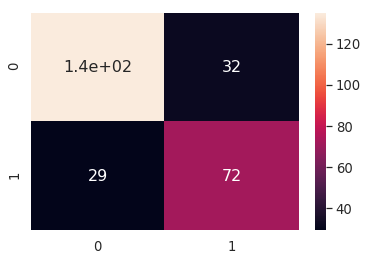

In [22]:
y_pred = classifier.predict(XtestV)
from sklearn.metrics import confusion_matrix ,accuracy_score
Train_Accuracy=  accuracy_score(ytrainV, classifier.predict(XtrainV))
Test_Accuracy= accuracy_score(ytestV, y_pred)
cm = confusion_matrix(ytestV, y_pred)
print ("train accuracy {}".format(Train_Accuracy))
print ("test accuracy {}".format(Test_Accuracy))



%matplotlib inline
import seaborn as sn
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(cm, range(2), range(2))
sn.set(font_scale=1.2) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()


In [23]:
survival_predication_Test = classifier.predict(testing_data_tuned)


submission = pd.DataFrame({ 'PassengerId': test.PassengerId,
                            'Survived': survival_predication_Test })
submission.to_csv("submission.csv", index=False)
submission.head()


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
